# SVM

###### 이 노트북에서는 library를 사용해서 다양한 예제를 보입니다.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles



### 1. c-svm vs nu-svm
##### c-svm과 nu-svm은 같은 svm에서 parameter와 수학적 표현이 다른 유사한 svm방식이다.
##### c-svm과 nu-svm을 linear case와 nonlinear case에서 비교헤보자

### C-SVM vs NU-SVM (Linear case)

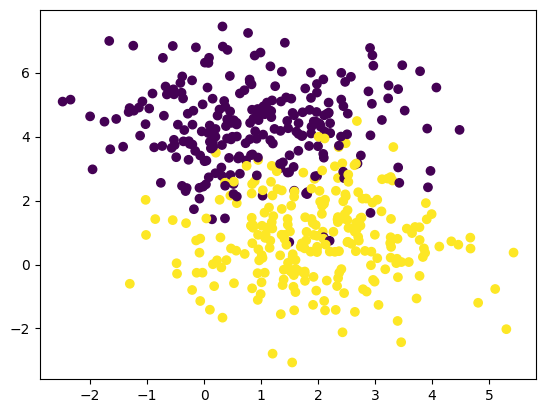

In [4]:
# dataset
X_1, y_1 = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=1.30)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.30, random_state=2)

-----
[[66  7]
 [ 2 75]]
-----
Accuracy: 0.940
Precision: 0.915
Recall: 0.974


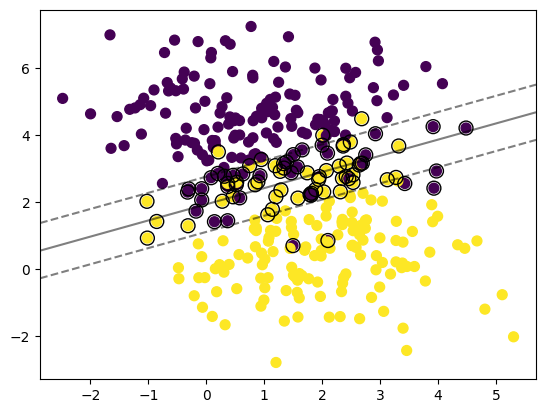

In [7]:
# c-svm
# fit
model = svm.SVC(kernel='linear',gamma='auto', C=10)
model.fit(X_train, y_train)

# predict
y_pred = model.fit(X_train, y_train).predict(X_test)
con_matrix = metrics.confusion_matrix(y_test, y_pred)
print("-----")
print(con_matrix)
print("-----")
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test, y_pred)))

# plot 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

-----
[[67  6]
 [ 2 75]]
-----
Accuracy: 0.947
Precision: 0.926
Recall: 0.974


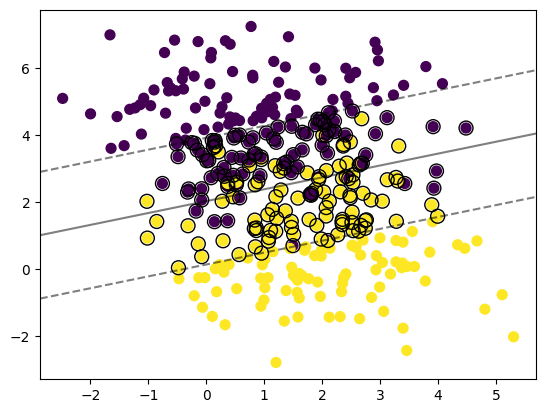

In [8]:
# nu-svm
# fit
model = svm.NuSVC(kernel='linear',gamma='auto', nu=0.5)
model.fit(X_train, y_train)

# predict
y_pred = model.fit(X_train, y_train).predict(X_test)
con_matrix = metrics.confusion_matrix(y_test, y_pred)
print("-----")
print(con_matrix)
print("-----")
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test, y_pred)))

# plot 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

#### nu-svm이 c-svm에 비해 margin이 더 넓은 것을 확인할 수 있지만 성능의 큰 차이는 없다.

### C-SVM vs NU-SVM (NonLinear case)

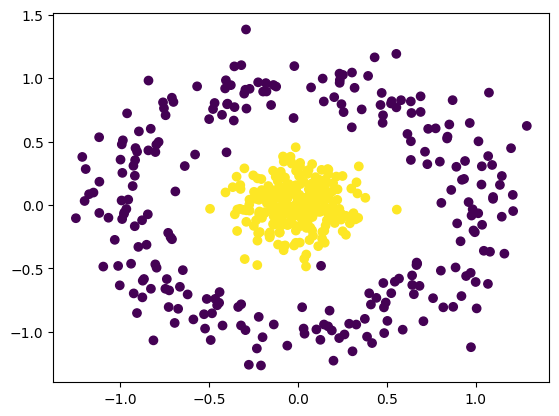

In [11]:
X_2, y_2 = make_circles(500, factor=.1, noise=.15)

plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.30, random_state=2)

-----
[[30 43]
 [15 62]]
-----
Accuracy: 0.613
Precision: 0.590
Recall: 0.805


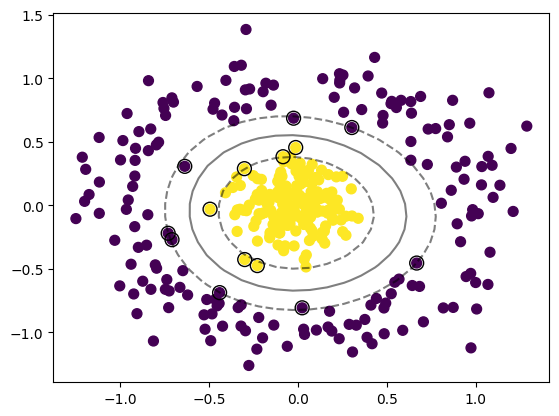

In [13]:
# c-svm with rbf function
# fit
model2 = svm.SVC(kernel='rbf', gamma='auto', C=10)
model2.fit(X_train2, y_train2)

# predict
y_pred2 = model.fit(X_train2, y_train2).predict(X_test2)
con_matrix = metrics.confusion_matrix(y_test2, y_pred2)
print("-----")
print(con_matrix)
print("-----")
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test2, y_pred2)))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test2, y_pred2)))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test2, y_pred2)))


# plot 
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, s=50)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model2.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

-----
[[71  2]
 [ 0 77]]
-----
Accuracy: 0.987
Precision: 0.975
Recall: 1.000


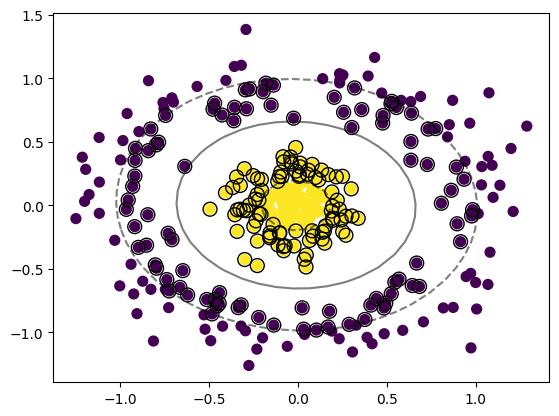

In [14]:
# nu-svm with rbf function
# fit
model2 = svm.NuSVC(kernel='rbf',gamma='auto', nu=0.5)
model2.fit(X_train2, y_train2)

# predict
y_pred2 = model2.fit(X_train2, y_train2).predict(X_test2)
con_matrix = metrics.confusion_matrix(y_test2, y_pred2)
print("-----")
print(con_matrix)
print("-----")
print("Accuracy: {:0.3f}".format(metrics.accuracy_score(y_test2, y_pred2)))
print("Precision: {:0.3f}".format(metrics.precision_score(y_test2, y_pred2)))
print("Recall: {:0.3f}".format(metrics.recall_score(y_test2, y_pred2)))

# plot 
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, s=50)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model2.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

#### Linear case에서와 마찬가지로 nu-svm이 c-svm보다 더 넓은 margin을 갖지만, 이번에는 nu-svm의 성능이 c-svm보다 훨씬 좋은 것을 확인할 수 있다. 

### 2. svm result by various kernel function and its hyperparameter
##### 다양한 kernel function과 hyperparameter에 따른 svm의 결과를 확인해보자

In [19]:
class SvmVisualizer():
    def __init__(self, X_train, y_train, X_test, y_test, 
                 n_svm_x_axis=1, n_svm_y_axis=1, figsize=(12, 9)):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.n_svm_x_axis = n_svm_x_axis
        self.n_svm_y_axis = n_svm_y_axis
        self.plt = plt.figure(figsize=figsize)
        
        # NOTE: we should do this based on the given data, now it works because we know
        # we scaled the data
        self.xx, self.yy = np.meshgrid(np.linspace(-3, 3, 200),
                                       np.linspace(-3, 3, 200))
        self.grid = np.c_[self.xx.ravel(), self.yy.ravel()]

    def add_svm_plot(self, svm, title, k=0):
        # visualize decision function for these parameters
        plt.subplot(self.n_svm_x_axis, self.n_svm_y_axis, k + 1)
        plt.title(title, size='medium')

        # evaluate decision function in a grid
        preds = svm.predict(self.grid).reshape(self.xx.shape)
        
        # visualize parameter's effect on decision function
        plt.pcolormesh(self.xx, self.yy, preds, cmap=ListedColormap(['lightblue', 'lightcoral']), 
                       vmin=0, vmax=1)
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], label="Train data",
                    edgecolors='k', c=self.y_train, cmap=ListedColormap(['blue', 'red']))
        #plt.scatter(self.X_test[:, 0], self.X_test[:, 1], label="Test data", edgecolors='k')
        plt.xticks(())
        plt.yticks(())
        plt.tight_layout()

        # plot the decision hyperplane and support vectors
        Z = svm.decision_function(self.grid).reshape(self.xx.shape)
        plt.contour(self.xx, self.yy, Z, colors='k', levels=[-1, 0, 1], 
                    alpha=0.5, linestyles=['--', '-', '--'])
        plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
                    facecolors='none', zorder=10, edgecolors='k')
                
def load_iris_2d(keep="nonlinear_relationship"):

    iris = load_iris()
    X_2d = iris.data[:, :2]
    y_2d = iris.target

    if keep == "nonlinear_relationship":
        X_2d = X_2d[y_2d > 0]
        y_2d = y_2d[y_2d > 0]
        y_2d -= 1
    else:
        X_2d = X_2d[y_2d < 2]
        y_2d = y_2d[y_2d < 2]

    return X_2d, y_2d

#### Data는 iris data를 사용


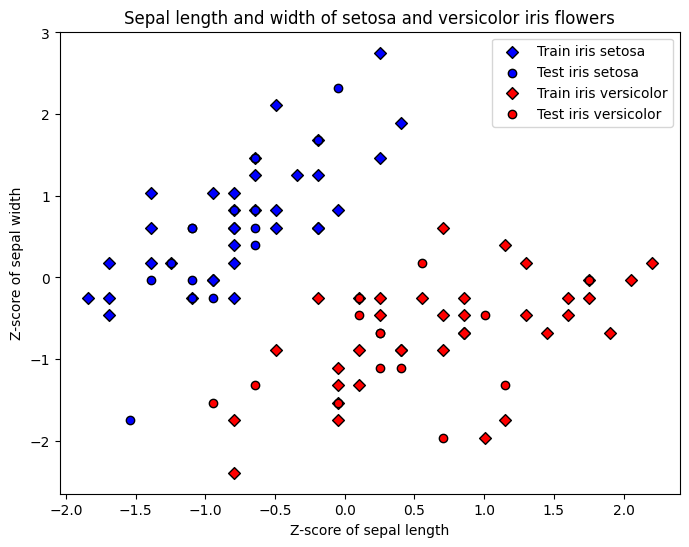

In [17]:
# iris data
# Load and split the dataset
X_2d, y_2d = load_iris_2d(keep="linear_relationship")
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.3, 
                                                    random_state=8)


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color="b", 
            label="Train iris setosa", edgecolors='k', marker="D")
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color="b", 
            label="Test iris setosa", edgecolors='k', marker="o")
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color="r", 
            label="Train iris versicolor", edgecolors='k', marker="D")
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color="r", 
            label="Test iris versicolor", edgecolors='k', marker="o")
plt.legend()
plt.title("Sepal length and width of setosa and versicolor iris flowers")
plt.xlabel("Z-score of sepal length")
plt.ylabel("Z-score of sepal width");

#### - Linear kernel function에서 c값에 따른 결과 시각화

###### c값을 크게 할수록 margin이 작아지는 것을 확인할 수 있다.

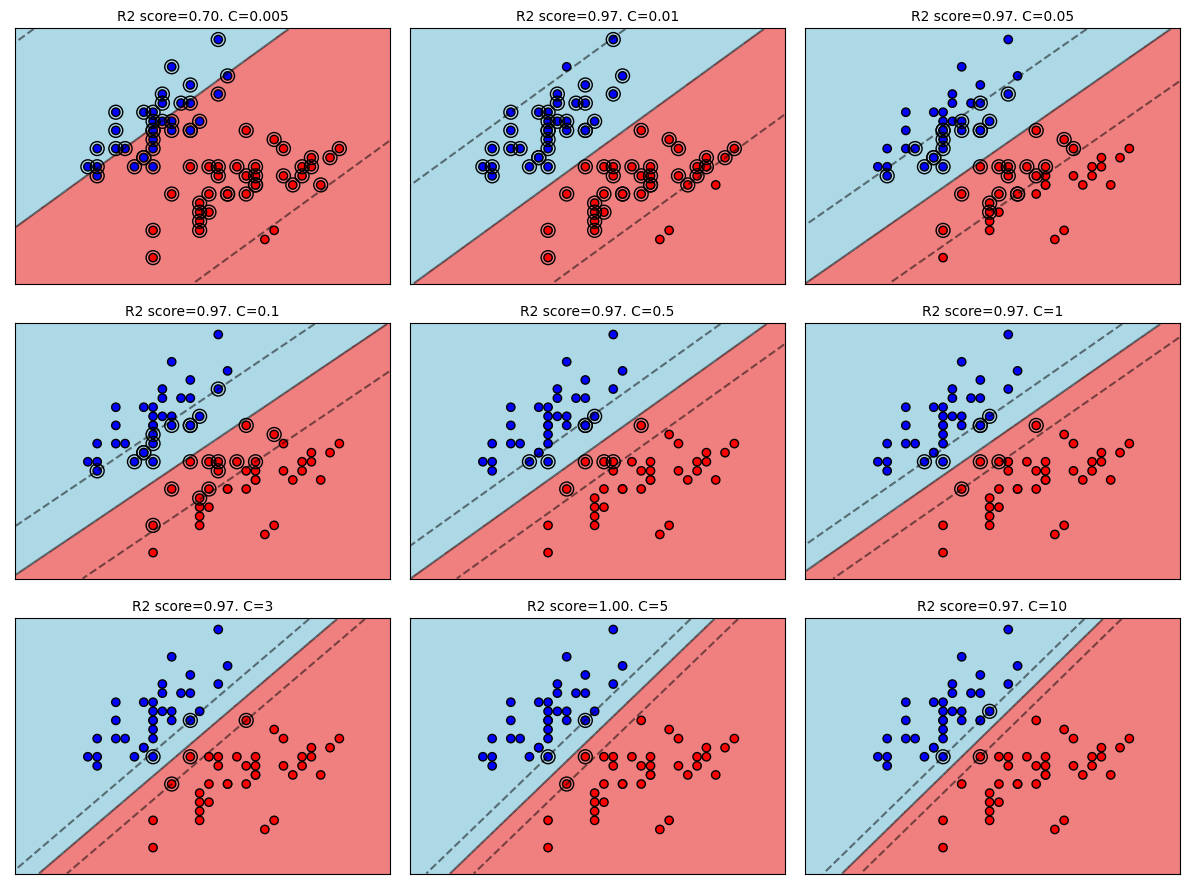

In [18]:
# linear svm에서 c값에 따른 결과
C_range = [5e-3, 1e-2, 5e-2, 1e-1, 0.5, 1, 3, 5, 10]
visualizer = SvmVisualizer(X_train, y_train, X_test, y_test, 3, 3)
k = 0

for C in C_range:
    clf = svm.SVC(C=C, kernel="linear", random_state=8)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    title = f"R2 score={score:.2f}. C={C}"
    visualizer.add_svm_plot(clf, title, k)
    k += 1

#### - RBF Kernel Function에서 c와 gamma값에 따른 결과 시각화

###### c값에 따라 차이는 있지만 c가 같을 때, gamma가 작을수록 선형에 가까운 결정 경계를 생성하고 gamma가 클수록 더 복잡한 결정 경계를 생성한다.

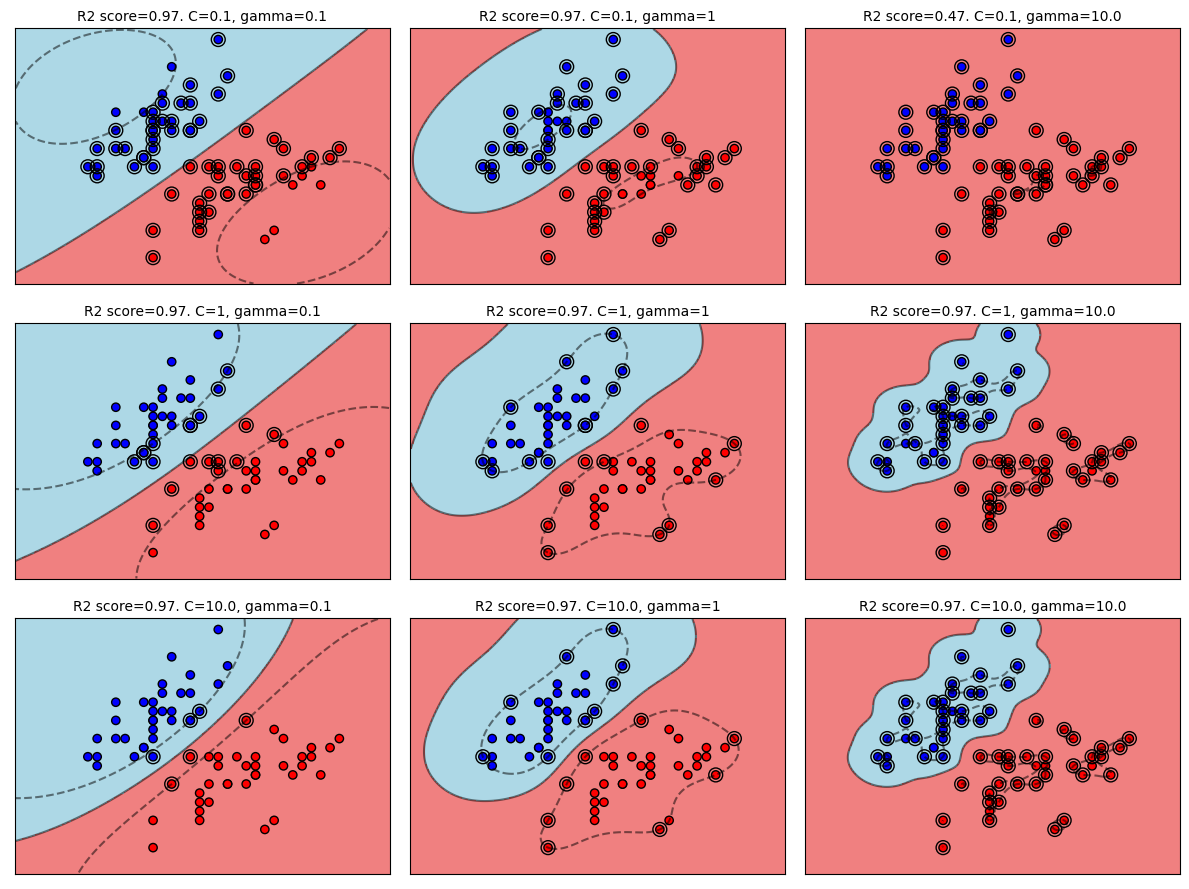

In [20]:
C_range = [1e-1, 1, 1e1]
gamma_range = [1e-1, 1, 1e1]
visualizer = SvmVisualizer(X_train, y_train, X_test, y_test, 3, 3)
k = 0

for C in C_range:
    for gamma in gamma_range:
        clf = svm.SVC(C=C, gamma=gamma, kernel="rbf", random_state=8)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        title = f"R2 score={score:.2f}. C={C}, gamma={gamma}"
        visualizer.add_svm_plot(clf, title, k)
        k += 1

#### - Polynomial Kernel Function에서 degree와 r값에 따른 결과 시각화

###### r이 작아질수록 더 복잡한 경계면을 만드는 것을 확인할 수 있다.
###### degree가 클수록 더 복잡한 경계면을 만드는 것을 확인할 수 있다.

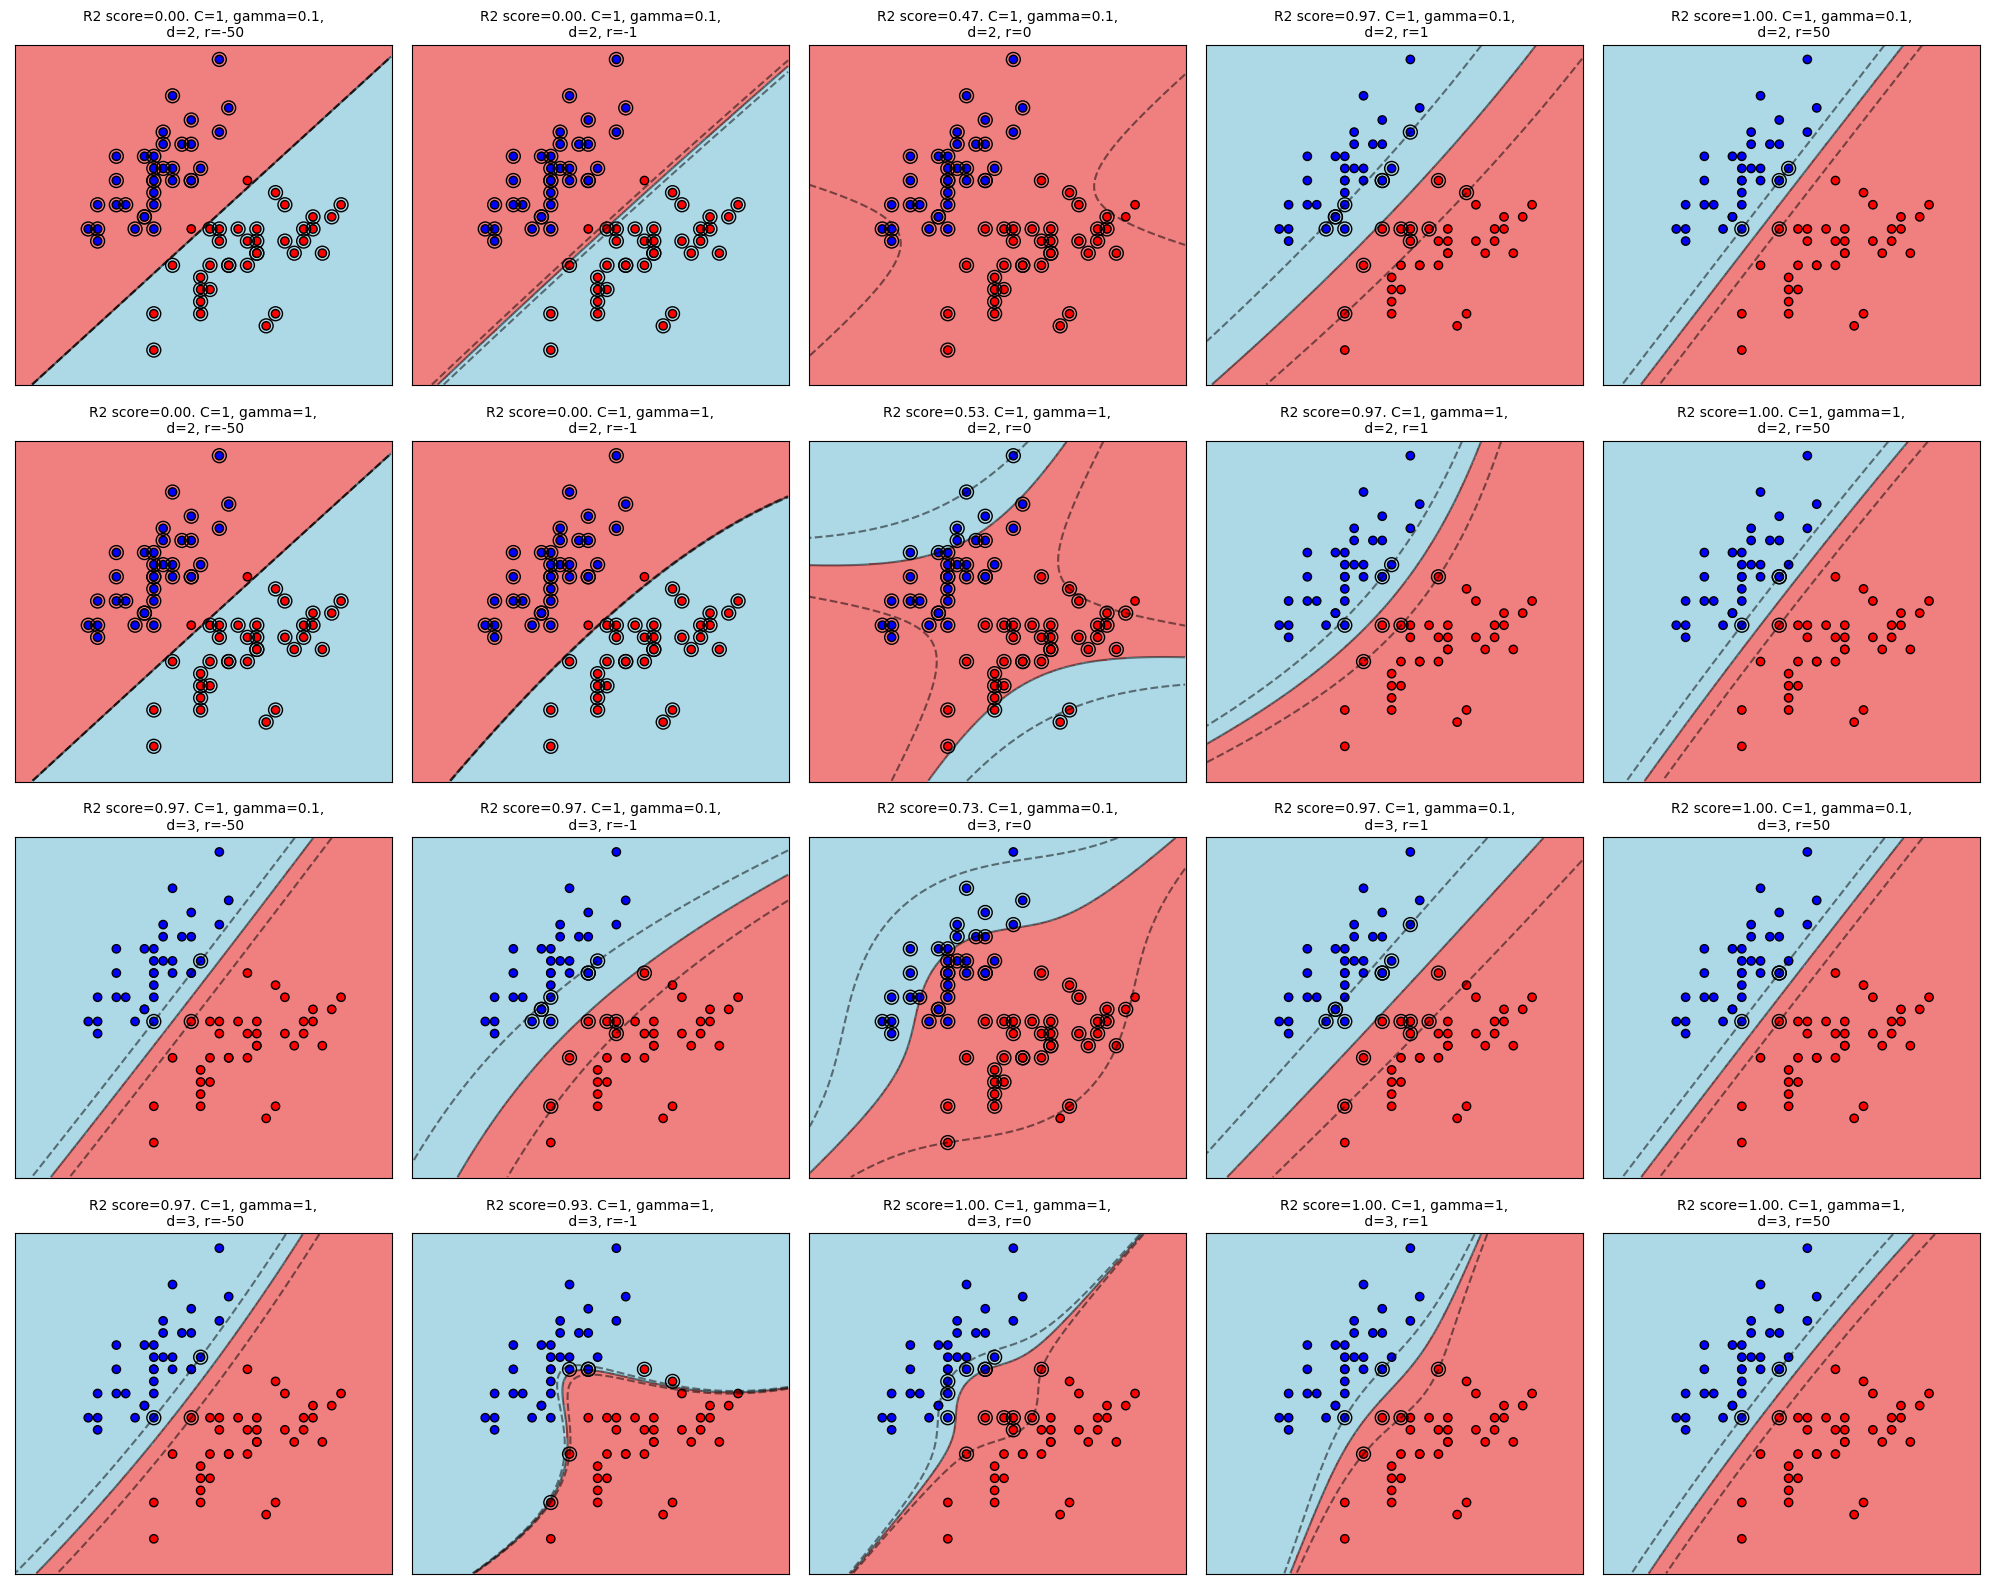

In [21]:
C_range = [1]
gamma_range = [0.1, 1]
degree_range = [2, 3]
coef0_range = [-50, -1, 0, 1, 50]
visualizer = SvmVisualizer(X_train, y_train, X_test, y_test, 4, 5, figsize=(20, 16))
k = 0

for C in C_range:
    for degree in degree_range:
        for gamma in gamma_range:
            for coef0 in coef0_range:
                clf = svm.SVC(C=C, gamma=gamma, degree=degree, coef0=coef0, kernel="poly", random_state=8)
                clf.fit(X_train, y_train)
                score = clf.score(X_test, y_test)
                title = f"R2 score={score:.2f}. C={C}, gamma={gamma},\n d={degree}, r={coef0}"
                visualizer.add_svm_plot(clf, title, k)
                k += 1

###### reference
###### https://zernes.github.io/SVM/
###### https://www.kaggle.com/code/carlosdg/effect-of-hyperparameters-and-kernels-on-svms/notebook